# **MScFE 660 RISK MANAGEMENT**
# **Group Work Project # 1**

In [52]:
!pip install pandas fredapi

# **Step 3**

## **a. Macroeconomic / Geopolitical specialist**

- Federal Funds Effective Rate (IR): Higher rates curb economic activity, reducing oil demand, while lower rates stimulate consumption.
- Inflation (CPI): Rising inflation often pushes up commodity prices, including oil, as a hedge and due to increased costs.
- Unemployment Rate (UNRATE): High unemployment reduces energy demand, while low rates signal stronger oil consumption.
- China GDP Growth: China’s industrial growth drives global oil demand; slowing growth weakens demand.
- VIX (Volatility Index): High market volatility dampens speculative investment in oil, affecting prices.

In [53]:
from fredapi import Fred
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import yfinance as yf
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import skew, kurtosis, shapiro, ttest_1samp
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import dateutil
start_date = '2004-01-01'
end_date = '2024-12-31'
fred = Fred(api_key='09573ec1dc0c523e914163ab565c56e8')

# Define Macroeconomic and Geopolitical Indicators
IR = fred.get_series('DFF', observation_start=start_date, observation_end=end_date).resample('1m').nearest() #Federal Funds Effective Rate (Interest rate)
Inflation = fred.get_series('CPIAUCSL', observation_start=start_date, observation_end=end_date).resample('1m').nearest() #CPI Inflation USA
VIX = fred.get_series('VIXCLS', observation_start=start_date, observation_end=end_date).resample('1m').nearest() #TED Spread
China_GDP_Grouth = fred.get_series('CHNGDPNQDSMEI', observation_start=start_date, observation_end=end_date).resample('1m').nearest() #China GDP Growth
UNRATE = fred.get_series('UNRATE', observation_start=start_date, observation_end=end_date).resample('1m').nearest() #Unemployment Rate

# Combine into a DataFrame
Macro_df = pd.concat([IR, Inflation, VIX, China_GDP_Grouth, UNRATE], axis=1)

Macro_df.columns = ['Interest Rate(US)', 'Inflation(US)', 'Geopolitical Risk', 'China_GDP_Grouth', 'Unemployment Rate(US)']
Macro_df = Macro_df.fillna(method='ffill')
Macro_df.head()

,Interest Rate(US),Inflation(US),Geopolitical Risk,China_GDP_Grouth,Unemployment Rate(US)
2004-01-31,1.03,186.7,16.63,3.454460e+12,5.6
2004-02-29,1.04,187.1,14.44,3.870080e+12,5.8
2004-03-31,1.05,187.4,16.74,3.870080e+12,5.6
2004-04-30,1.03,188.2,17.19,3.870080e+12,5.6
2004-05-31,1.02,188.9,17.19,4.185500e+12,5.6


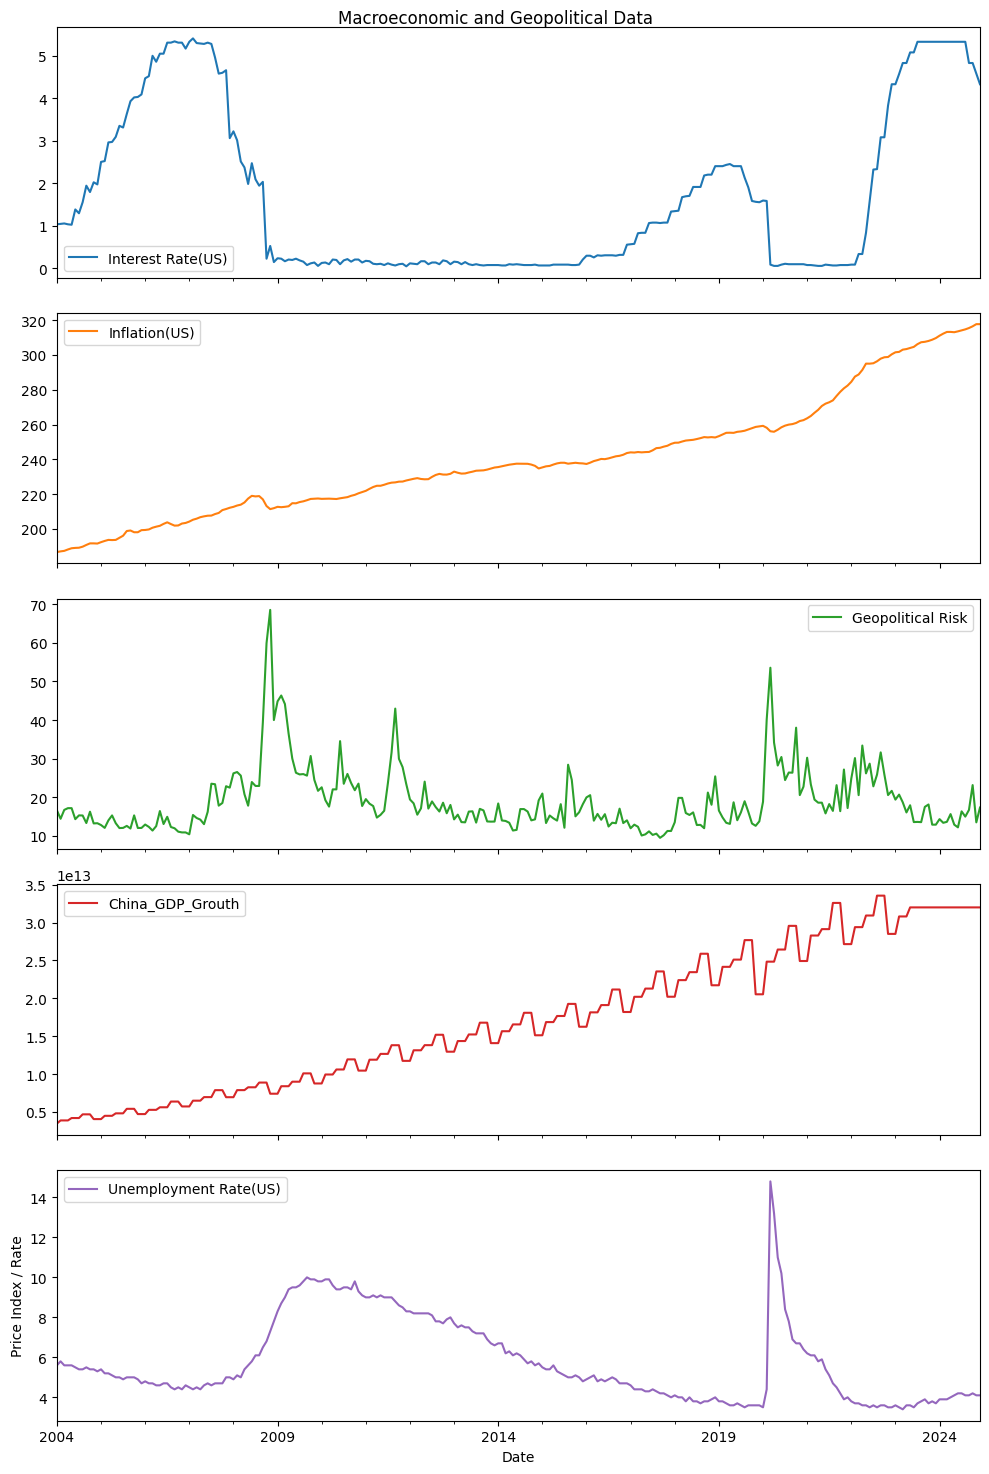

In [54]:
Macro_df.plot(subplots=True, figsize=(10, 15), title="Macroeconomic and Geopolitical Data")
plt.ylabel("Price Index / Rate")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

## **b. Microeconomic specialist**

- Shipping Costs: Higher costs signal increased trade and oil demand for transportation.
- Brent Crude Prices: A global benchmark directly reflecting shifts in oil supply and demand.
- WTI Prices: A North American benchmark influenced by domestic production and inventories.
- Gasoline Prices: Track crude oil costs and signal consumer demand trends.
- Heating Oil Prices: Seasonal demand impacts oil markets, especially in colder months.

In [55]:
# Retrieve data from FRED
shipping_costs = fred.get_series("ICSA", observation_start=start_date, observation_end=end_date).resample('1m').nearest()  # Shipping Costs
brent_crude_prices = fred.get_series("DCOILBRENTEU", observation_start=start_date, observation_end=end_date).resample('1m').nearest()  # Brent Crude Prices
wti_prices = fred.get_series("DCOILWTICO", observation_start=start_date, observation_end=end_date).resample('1m').nearest()  # WTI Prices
gas_prices = fred.get_series("GASREGW", observation_start=start_date, observation_end=end_date).resample('1m').nearest()  # Retail Gasoline Prices
heating_oil_prices = fred.get_series("DHOILNYH", observation_start=start_date, observation_end=end_date).resample('1m').nearest()  # Heating Oil Prices

# Combine into a DataFrame
micro_data = {
    "Shipping Costs": shipping_costs,
    "Brent Prices": brent_crude_prices,
    "WTI Prices": wti_prices,
    "Gasoline Prices": gas_prices,
    "Heating Oil Prices": heating_oil_prices,
}

micro_df = pd.DataFrame(micro_data)

Micro_df = micro_df.fillna(method='ffill')
Micro_df.head()



,Shipping Costs,Brent Prices,WTI Prices,Gasoline Prices,Heating Oil Prices
2004-01-31,376000.0,29.53,33.16,1.616,0.937
2004-02-29,348000.0,33.34,36.85,1.717,0.963
2004-03-31,335000.0,32.29,35.75,1.758,0.893
2004-04-30,324000.0,35.23,37.31,1.844,0.953
2004-05-31,337000.0,37.00,37.31,2.051,0.953


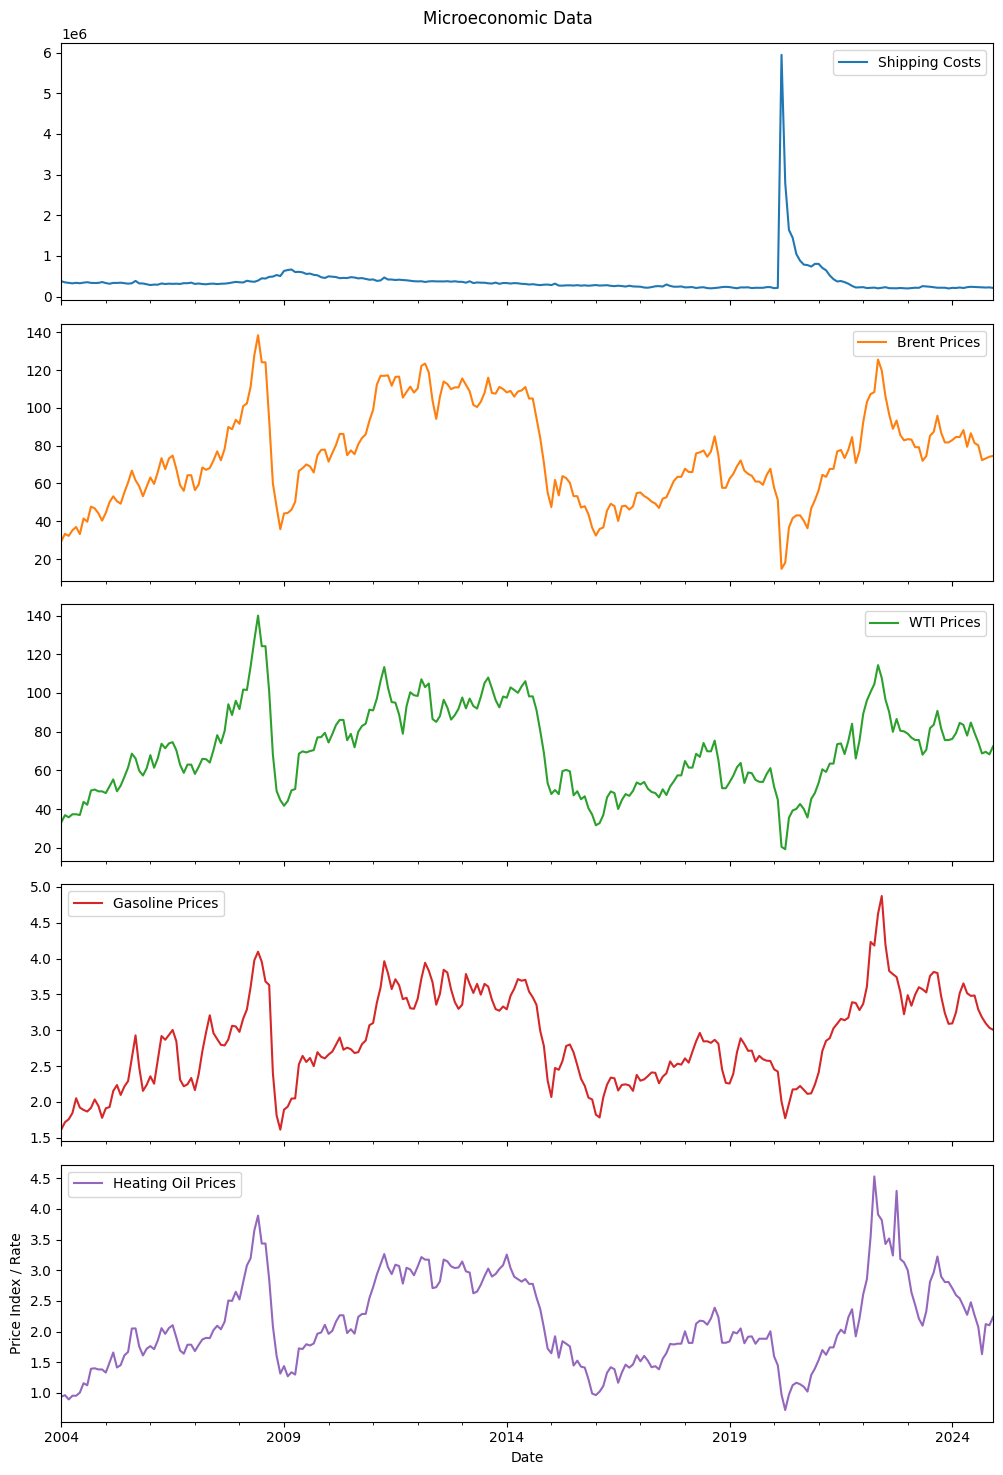

In [56]:
Micro_df.plot(subplots=True, figsize=(10, 15), title="Microeconomic Data")
plt.ylabel("Price Index / Rate")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


## **c. Financial Securities**

- XLE (Energy Select Sector SPDR): Tracks major energy companies; rises with oil prices.
- OIH (Oil Services ETF): Reflects investment in drilling and exploration activity tied to oil prices.
- XOM & CVX (ExxonMobil & Chevron): Their profitability aligns with oil price movements.
- S&P 500 (^GSPC): Economic strength in equities suggests higher oil demand.

In [57]:
# Define securities that affect oil prices globally
securities = "XLE OIH XOM CVX ^GSPC "

# Download data
data_securities = yf.download(securities, threads=True, start=start_date, end=end_date, interval="1mo")
Fin_sec = data_securities["Close"]
Fin_sec.head()

[*********************100%***********************]  5 of 5 completed


Ticker,CVX,OIH,XLE,XOM,^GSPC
Date,,,,,
2004-01-01,19.673988,309.363770,15.786882,20.502733,1131.130005
2004-02-01,20.129669,332.360321,16.616293,21.196381,1144.939941
2004-03-01,20.168222,320.985657,16.442570,21.034658,1126.209961
2004-04-01,21.022917,317.860596,16.793827,21.520191,1107.300049
2004-05-01,20.770184,302.788544,16.743170,21.874220,1120.680054


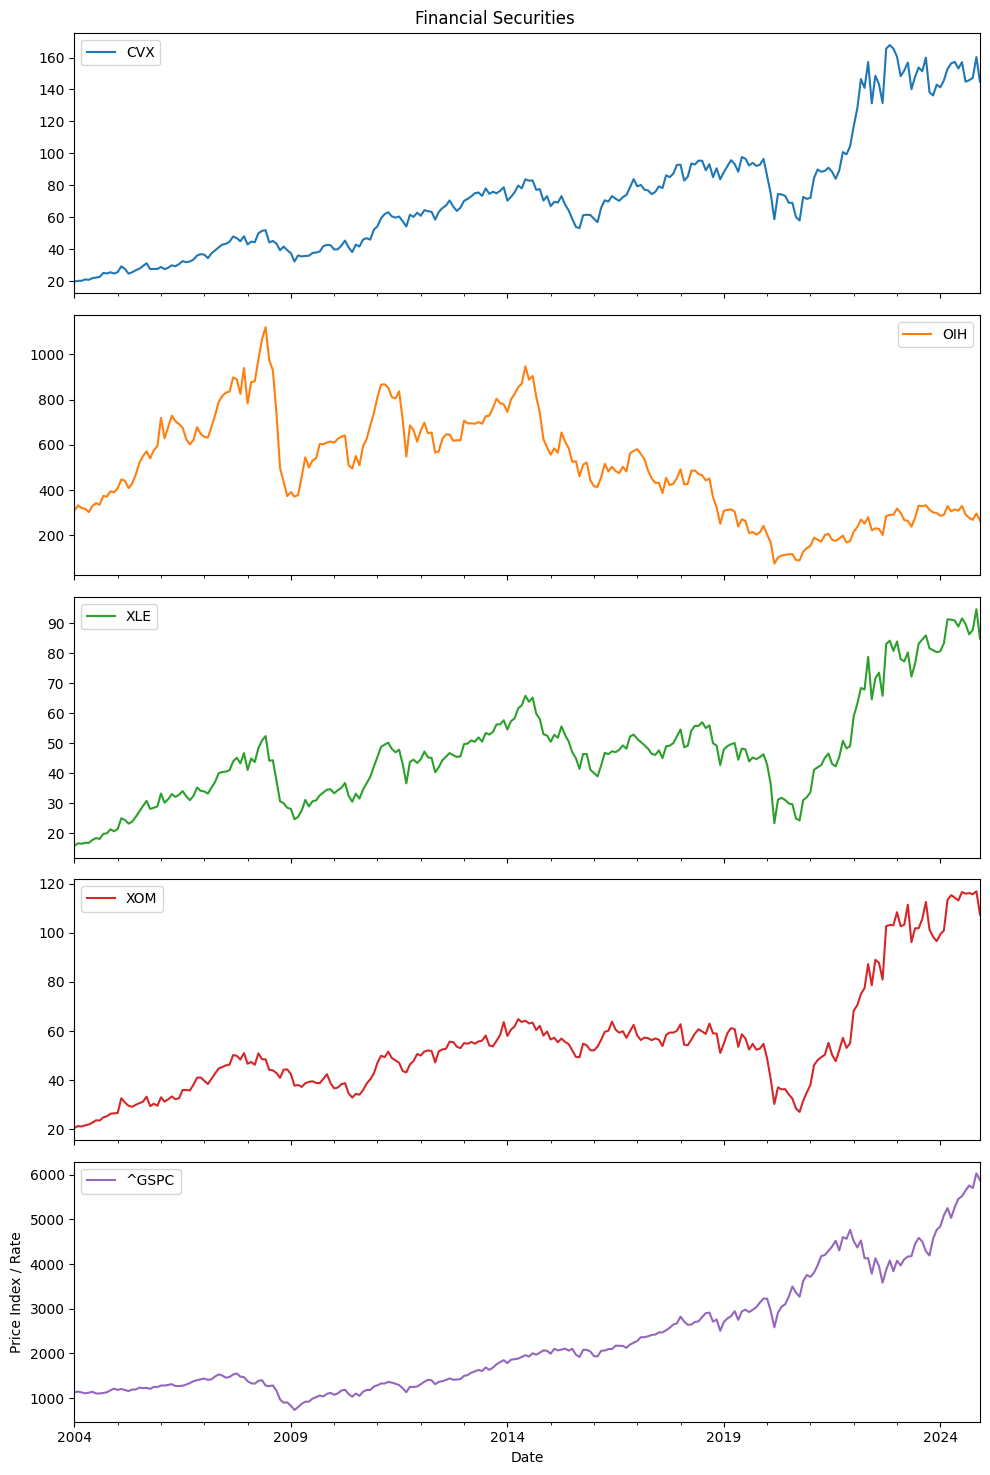

In [58]:
Fin_sec.plot(subplots=True, figsize=(10, 15), title="Financial Securities")
plt.ylabel("Price Index / Rate")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

# **Step 4**

In [59]:
import pandas as pd
from tabulate import tabulate

# Data dictionary
data_sources = {
    "Macroeconomic Data": {
        "Interest Rate (US)": {"Frequency": "Monthly", "Source": "FRED (DFF)", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
        "Inflation (US)": {"Frequency": "Monthly", "Source": "FRED (CPIAUCSL)", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
        "Geopolitical Risk": {"Frequency": "Monthly", "Source": "FRED (VIXCLS)", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
        "China GDP Growth": {"Frequency": "Monthly", "Source": "FRED (CHNGDPNQDSMEI)", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
        "Unemployment Rate (US)": {"Frequency": "Monthly", "Source": "FRED (UNRATE)", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
    },
    "Microeconomic Data": {
        "Shipping Costs": {"Frequency": "Monthly", "Source": "FRED (ICSA)", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
        "Brent Prices": {"Frequency": "Monthly", "Source": "FRED (DCOILBRENTEU)", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
        "WTI Prices": {"Frequency": "Monthly", "Source": "FRED (DCOILWTICO)", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
        "Gasoline Prices": {"Frequency": "Monthly", "Source": "FRED (GASREGW)", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
        "Heating Oil Prices": {"Frequency": "Monthly", "Source": "FRED (DHOILNYH)", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
    },
    "Financial Securities": {
        "CVX": {"Frequency": "Monthly", "Source": "Yahoo Finance", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
        "OIH": {"Frequency": "Monthly", "Source": "Yahoo Finance", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
        "XLE": {"Frequency": "Monthly", "Source": "Yahoo Finance", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
        "XOM": {"Frequency": "Monthly", "Source": "Yahoo Finance", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
        "^GSPC": {"Frequency": "Monthly", "Source": "Yahoo Finance", "Start Date": "2004-01-01", "End Date": "2024-12-31"},
    },
}

# Convert to a DataFrame for tabular display
rows = []
for category, indicators in data_sources.items():
    for indicator, details in indicators.items():
        rows.append([category, indicator, details["Frequency"], details["Source"], details["Start Date"], details["End Date"]])

data_table = pd.DataFrame(rows, columns=["Category", "Indicator", "Frequency", "Source", "Start Date", "End Date"])

# Print the table
print(tabulate(data_table, headers="keys", tablefmt="github"))

# Save to CSV for further use
data_table.to_csv("data_summary.csv", index=False)


|    | Category             | Indicator              | Frequency   | Source               | Start Date   | End Date   |
|----|----------------------|------------------------|-------------|----------------------|--------------|------------|
|  0 | Macroeconomic Data   | Interest Rate (US)     | Monthly     | FRED (DFF)           | 2004-01-01   | 2024-12-31 |
|  1 | Macroeconomic Data   | Inflation (US)         | Monthly     | FRED (CPIAUCSL)      | 2004-01-01   | 2024-12-31 |
|  2 | Macroeconomic Data   | Geopolitical Risk      | Monthly     | FRED (VIXCLS)        | 2004-01-01   | 2024-12-31 |
|  3 | Macroeconomic Data   | China GDP Growth       | Monthly     | FRED (CHNGDPNQDSMEI) | 2004-01-01   | 2024-12-31 |
|  4 | Macroeconomic Data   | Unemployment Rate (US) | Monthly     | FRED (UNRATE)        | 2004-01-01   | 2024-12-31 |
|  5 | Microeconomic Data   | Shipping Costs         | Monthly     | FRED (ICSA)          | 2004-01-01   | 2024-12-31 |
|  6 | Microeconomic Data   | Brent Pric

| Category              | Indicator                 | Frequency | Source                      | Start Date | End Date   |
|-----------------------|---------------------------|-----------|-----------------------------|------------|------------|
| Macroeconomic Data    | Interest Rate (US)       | Monthly   | FRED (DFF)                 | 2004-01-01 | 2024-12-31 |
| Macroeconomic Data    | Inflation (US)           | Monthly   | FRED (CPIAUCSL)            | 2004-01-01 | 2024-12-31 |
| Geopolitical Data    | Geopolitical Risk        | Monthly   | FRED (VIXCLS)              | 2004-01-01 | 2024-12-31 |
| Macroeconomic Data    | China GDP Growth         | Monthly   | FRED (CHNGDPNQDSMEI)       | 2004-01-01 | 2024-12-31 |
| Macroeconomic Data    | Unemployment Rate (US)   | Monthly   | FRED (UNRATE)              | 2004-01-01 | 2024-12-31 |
| Microeconomic Data    | Shipping Costs           | Monthly   | FRED (ICSA)                | 2004-01-01 | 2024-12-31 |
| Microeconomic Data    | Brent Prices             | Monthly   | FRED (DCOILBRENTEU)        | 2004-01-01 | 2024-12-31 |
| Microeconomic Data    | WTI Prices               | Monthly   | FRED (DCOILWTICO)          | 2004-01-01 | 2024-12-31 |
| Microeconomic Data    | Gasoline Prices          | Monthly   | FRED (GASREGW)             | 2004-01-01 | 2024-12-31 |
| Microeconomic Data    | Heating Oil Prices       | Monthly   | FRED (DHOILNYH)            | 2004-01-01 | 2024-12-31 |
| Financial Securities  | CVX                      | Monthly   | Yahoo Finance              | 2004-01-01 | 2024-12-31 |
| Financial Securities  | OIH                      | Monthly   | Yahoo Finance              | 2004-01-01 | 2024-12-31 |
| Financial Securities  | XLE                      | Monthly   | Yahoo Finance              | 2004-01-01 | 2024-12-31 |
| Financial Securities  | XOM                      | Monthly   | Yahoo Finance              | 2004-01-01 | 2024-12-31 |
| Financial Securities  | ^GSPC                    | Monthly   | Yahoo Finance              | 2004-01-01 | 2024-12-31 |


# **Step 5**

## **Handling Extreme Outliers**

In [60]:
from scipy.stats import zscore

# Function to remove outliers using Z-score
def remove_outliers_zscore(df, threshold=3.5):
    z_scores = df.apply(zscore, nan_policy='omit')
    return df[(z_scores < threshold).all(axis=1)]

# Clean each dataset for outliers
macro_cleaned = remove_outliers_zscore(Macro_df)
micro_cleaned = remove_outliers_zscore(Micro_df)
fin_cleaned = remove_outliers_zscore(Fin_sec)

# Verify the shape after cleaning
print("Macro Data Cleaned Shape:", macro_cleaned.shape)
print("Micro Data Cleaned Shape:", micro_cleaned.shape)
print("Financial Securities Data Cleaned Shape:", fin_cleaned.shape)



Macro Data Cleaned Shape: (248, 5)
Micro Data Cleaned Shape: (250, 5)
Financial Securities Data Cleaned Shape: (252, 5)


## **Handling Bad Data**

In [61]:
# Function to drop duplicate rows
def remove_duplicates(df):
    return df.drop_duplicates()

# Function to handle invalid data
def handle_invalid_data(df):
    # Replace negative values in financial data with NaN (assuming no negative values are valid here)
    df[df < 0] = np.nan
    return df

# Clean each dataset for bad data
macro_no_duplicates = remove_duplicates(Macro_df)
macro_validated = handle_invalid_data(macro_no_duplicates)

micro_no_duplicates = remove_duplicates(Micro_df)
micro_validated = handle_invalid_data(micro_no_duplicates)

fin_no_duplicates = remove_duplicates(Fin_sec)
fin_validated = handle_invalid_data(fin_no_duplicates)

# Verify results
print("Macro Data Validated Shape:", macro_validated.shape)
print("Micro Data Validated Shape:", micro_validated.shape)
print("Financial Securities Data Validated Shape:", fin_validated.shape)



Macro Data Validated Shape: (252, 5)
Micro Data Validated Shape: (252, 5)
Financial Securities Data Validated Shape: (252, 5)


## **Handling Missing Values**

In [62]:
# Function to handle missing values
def fill_missing_values(df, method='interpolate'):
    if method == 'interpolate':
        return df.interpolate(method='time')
    elif method == 'mean':
        return df.fillna(df.mean())
    elif method == 'median':
        return df.fillna(df.median())
    else:
        raise ValueError("Unsupported method: Choose 'interpolate', 'mean', or 'median'.")

# Fill missing values in each dataset
macro_filled = fill_missing_values(Macro_df, method='interpolate')
micro_filled = fill_missing_values(Micro_df, method='interpolate')
fin_filled = fill_missing_values(Fin_sec, method='interpolate')

# Verify results
print("Macro Data Filled Shape:", macro_filled.shape)
print("Micro Data Filled Shape:", micro_filled.shape)
print("Financial Securities Data Filled Shape:", fin_filled.shape)




Macro Data Filled Shape: (252, 5)
Micro Data Filled Shape: (252, 5)
Financial Securities Data Filled Shape: (252, 5)


# **Step 6**
## **Combining the cleaned data to create a final, “sterilized” dataset**


In [63]:
# Combine the cleaned datasets
final_macro = remove_outliers_zscore(fill_missing_values(remove_duplicates(Macro_df)))
final_micro = remove_outliers_zscore(fill_missing_values(remove_duplicates(Micro_df)))
final_fin = remove_outliers_zscore(fill_missing_values(remove_duplicates(Fin_sec)))

# Verify final shapes
print("Final Macro Shape:", final_macro.shape)
print("Final Micro Shape:", final_micro.shape)
print("Final Financial Securities Shape:", final_fin.shape)

# Save cleaned data to CSV for further analysis
final_macro.to_csv("cleaned_macro_data.csv")
final_micro.to_csv("cleaned_micro_data.csv")
final_fin.to_csv("cleaned_financial_data.csv")

Final Macro Shape: (248, 5)
Final Micro Shape: (250, 5)
Final Financial Securities Shape: (252, 5)


In [64]:
Macro_df.head()

,Interest Rate(US),Inflation(US),Geopolitical Risk,China_GDP_Grouth,Unemployment Rate(US)
2004-01-31,1.03,186.7,16.63,3.454460e+12,5.6
2004-02-29,1.04,187.1,14.44,3.870080e+12,5.8
2004-03-31,1.05,187.4,16.74,3.870080e+12,5.6
2004-04-30,1.03,188.2,17.19,3.870080e+12,5.6
2004-05-31,1.02,188.9,17.19,4.185500e+12,5.6


# **Step 7**

## **Student A creates “distributional” plots**


In [65]:
Macro_returns = final_macro.dropna().pct_change().dropna()
Macro_returns.head()

,Interest Rate(US),Inflation(US),Geopolitical Risk,China_GDP_Grouth,Unemployment Rate(US)
2004-02-29,0.009709,0.002142,-0.131690,0.120314,0.035714
2004-03-31,0.009615,0.001603,0.159280,0.000000,-0.034483
2004-04-30,-0.019048,0.004269,0.026882,0.000000,0.000000
2004-05-31,-0.009709,0.003719,0.000000,0.081502,0.000000
2004-06-30,0.352941,0.001059,-0.165794,0.000000,-0.017857


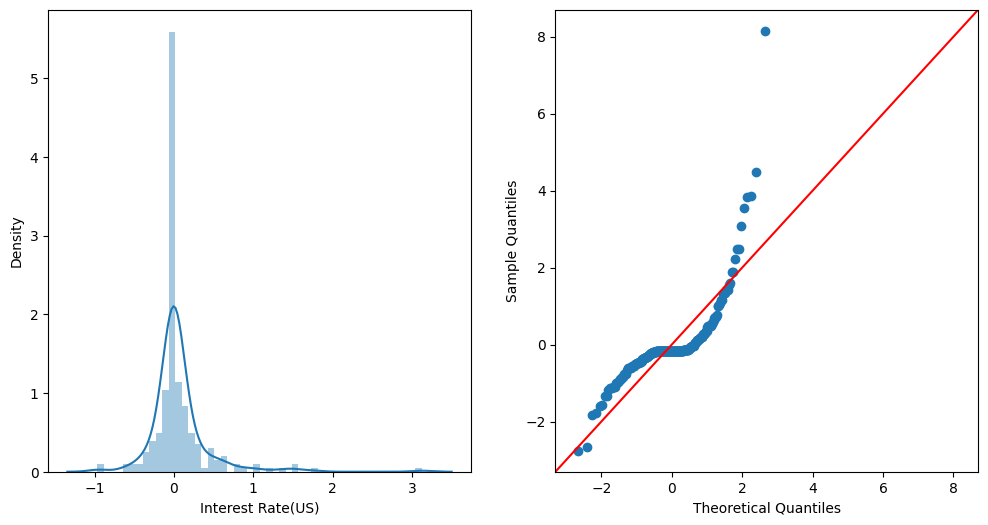

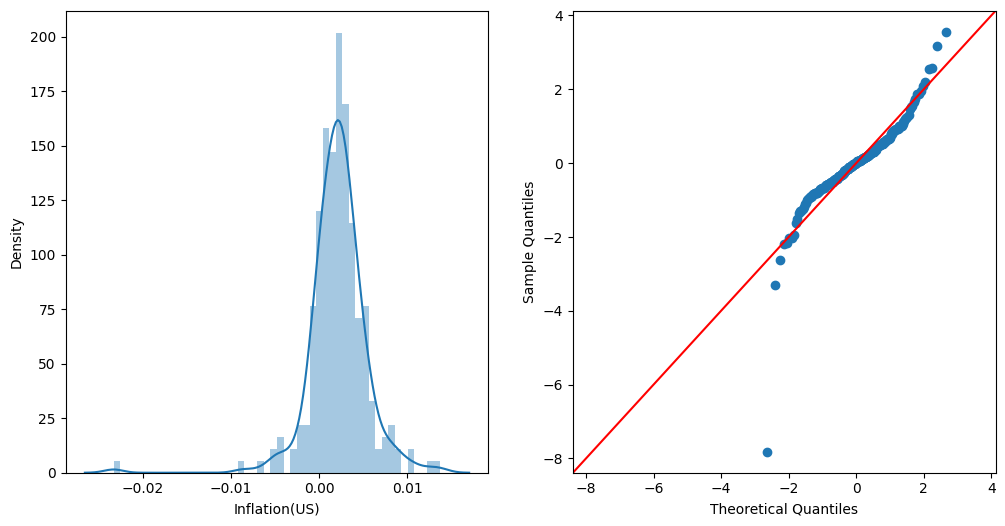

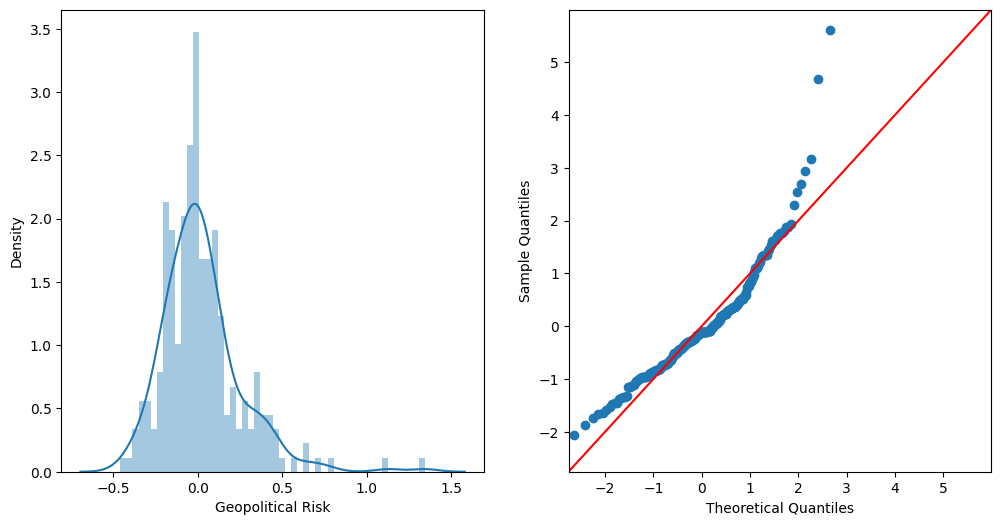

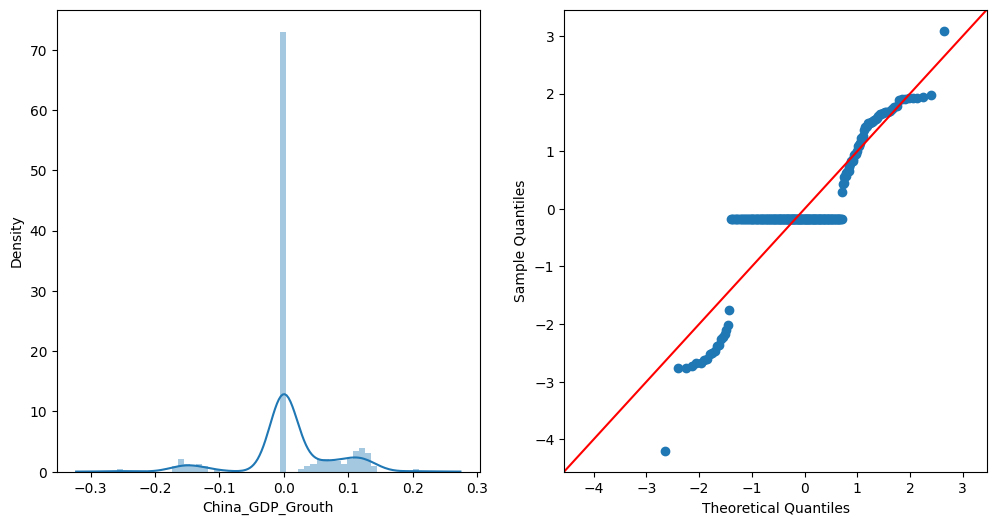

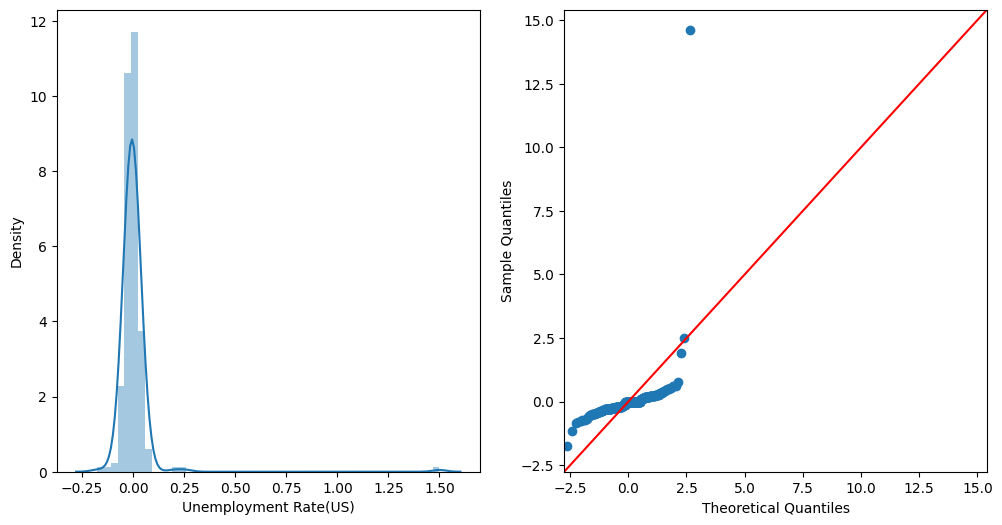

In [66]:
for i in Macro_returns:
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    sns.distplot(a=Macro_returns[i], ax=ax[0], bins=50)
    sm.qqplot(Macro_returns[i], fit=True, line="45", ax=ax[1])
    fig.show()

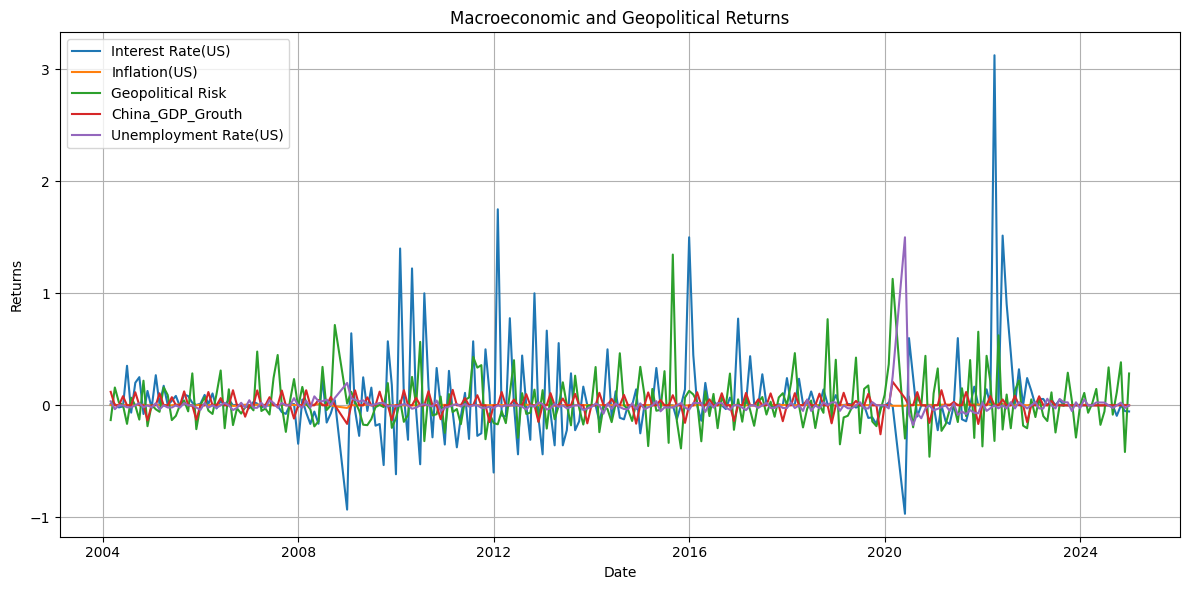

In [67]:
plt.figure(figsize=(12, 6))
for column in Macro_returns.columns:
    plt.plot(Macro_returns.index, Macro_returns[column], label=column)

plt.title("Macroeconomic and Geopolitical Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

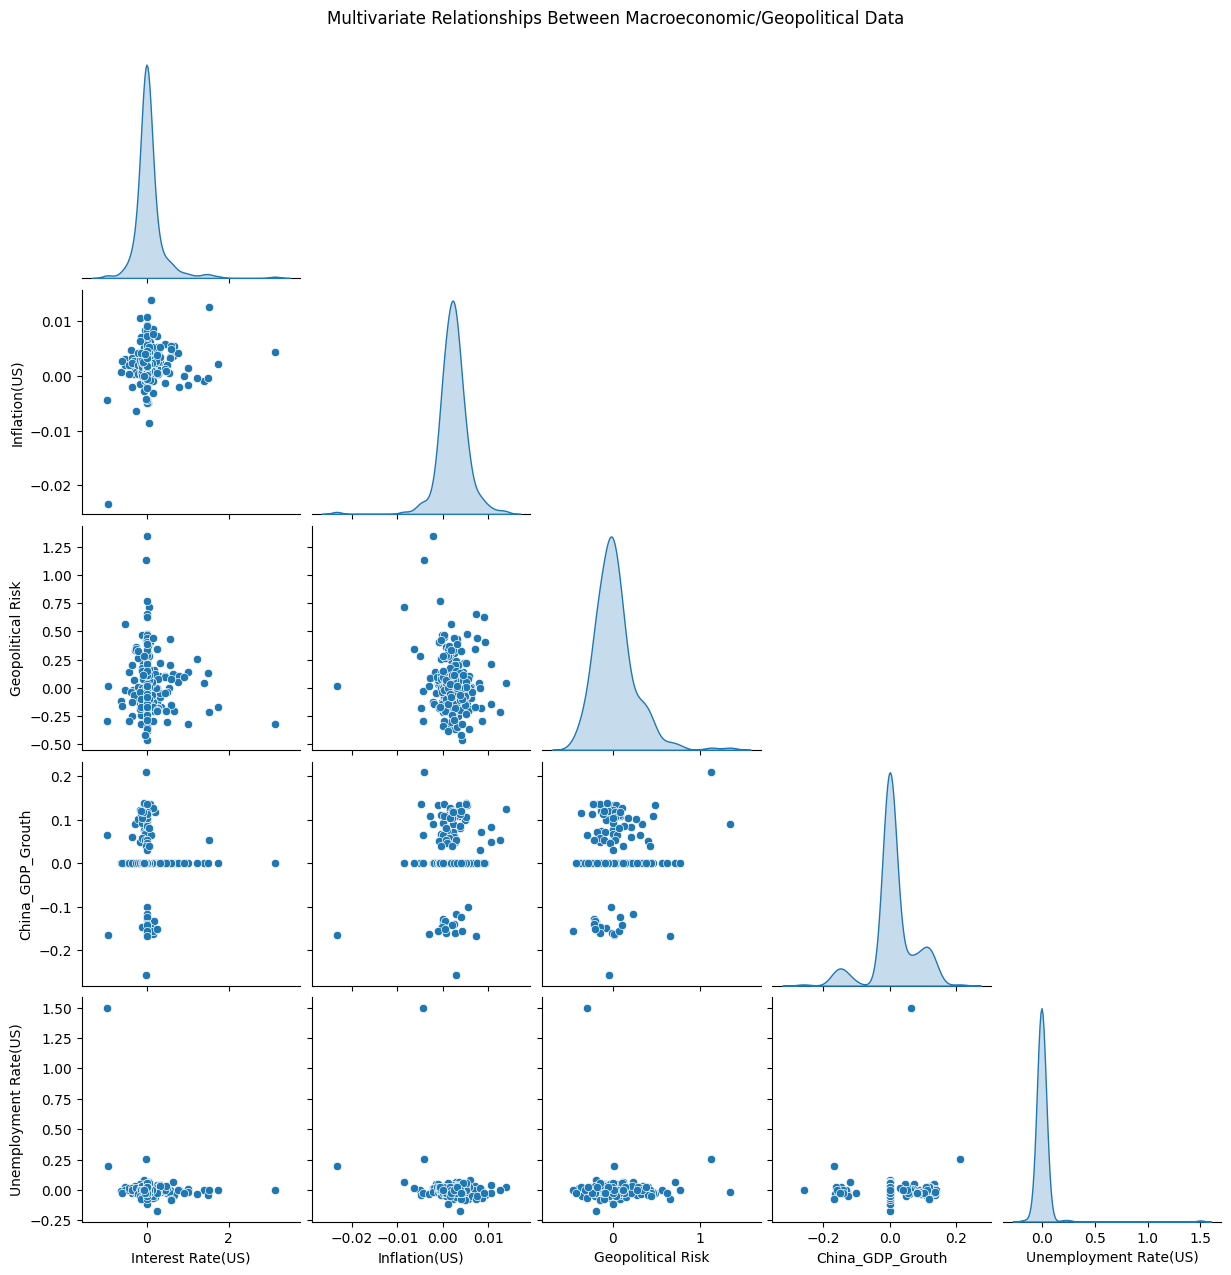

In [95]:
sns.pairplot(Macro_returns, diag_kind="kde", corner=True)
plt.suptitle("Multivariate Relationships Between Macroeconomic/Geopolitical Data", y=1.02)
plt.show()



## **Student B creates “time series” plots.**


In [68]:
Micro_returns = final_micro.dropna().pct_change().dropna()
Micro_returns.head()

,Shipping Costs,Brent Prices,WTI Prices,Gasoline Prices,Heating Oil Prices
2004-02-29,-0.074468,0.129021,0.111279,0.062500,0.027748
2004-03-31,-0.037356,-0.031494,-0.029851,0.023879,-0.072690
2004-04-30,-0.032836,0.091050,0.043636,0.048919,0.067189
2004-05-31,0.040123,0.050241,0.000000,0.112256,0.000000
2004-06-30,-0.032641,-0.102162,-0.010453,-0.063384,0.053515


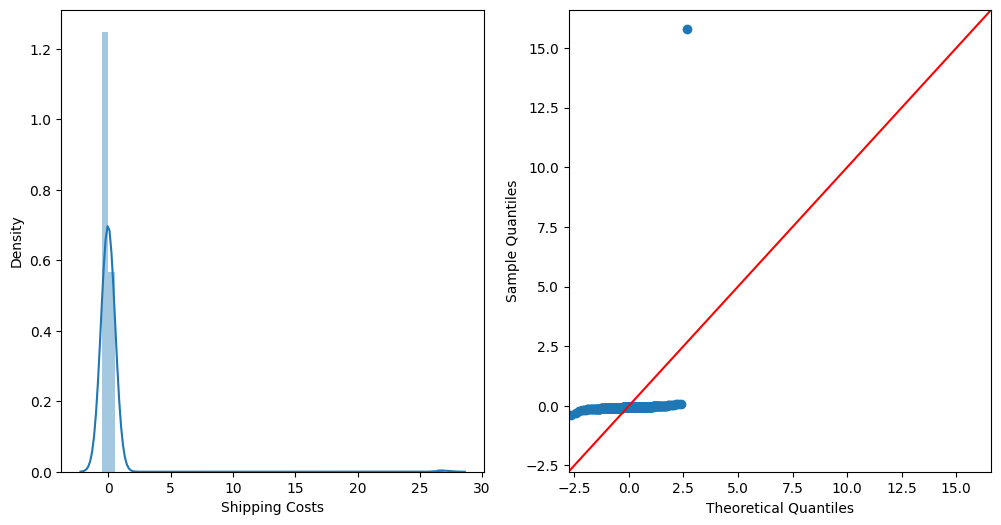

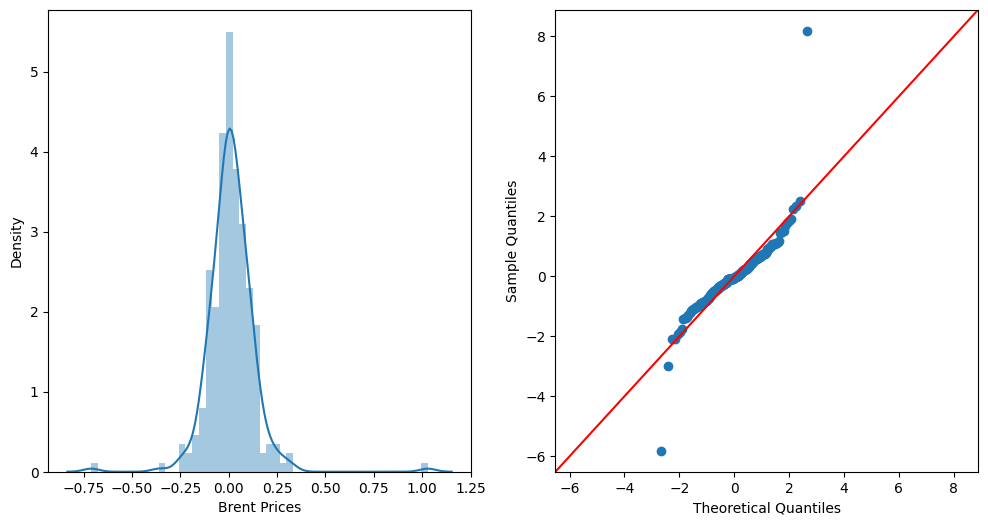

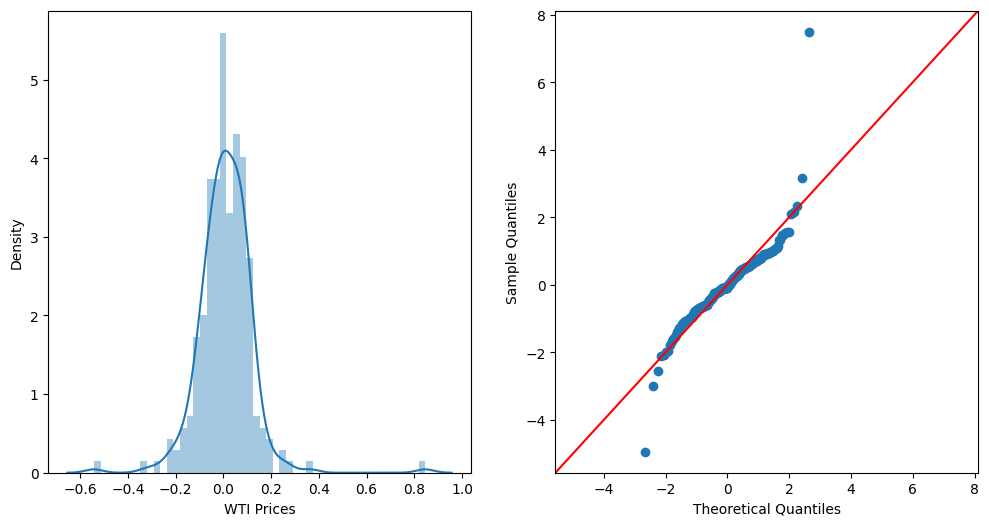

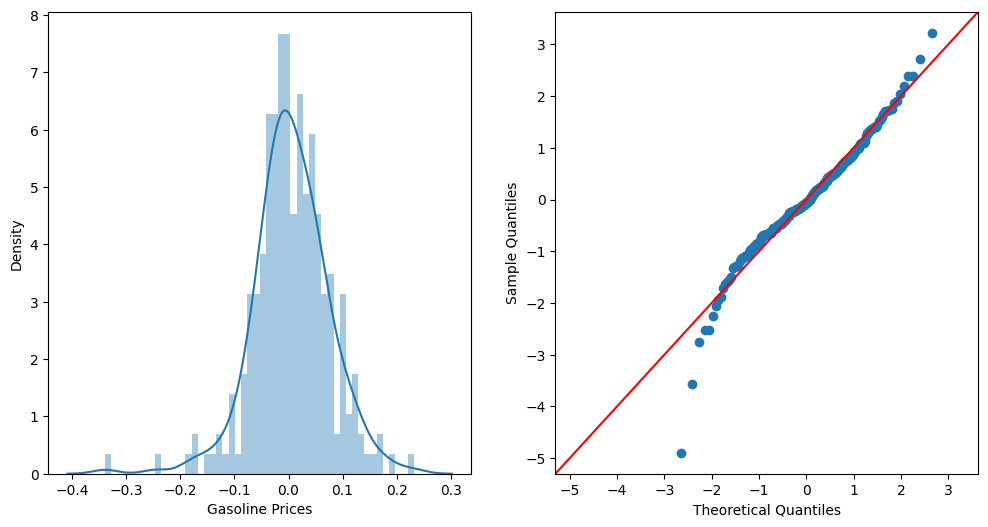

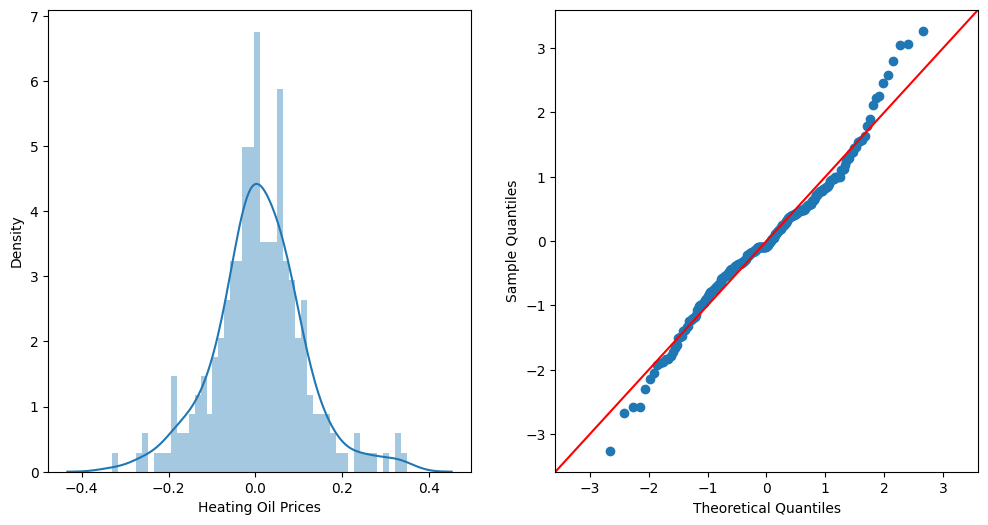

In [96]:
for i in Micro_returns:
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    sns.distplot(a=Micro_returns[i], ax=ax[0], bins=50)
    sm.qqplot(Micro_returns[i], fit=True, line="45", ax=ax[1])
    fig.show()

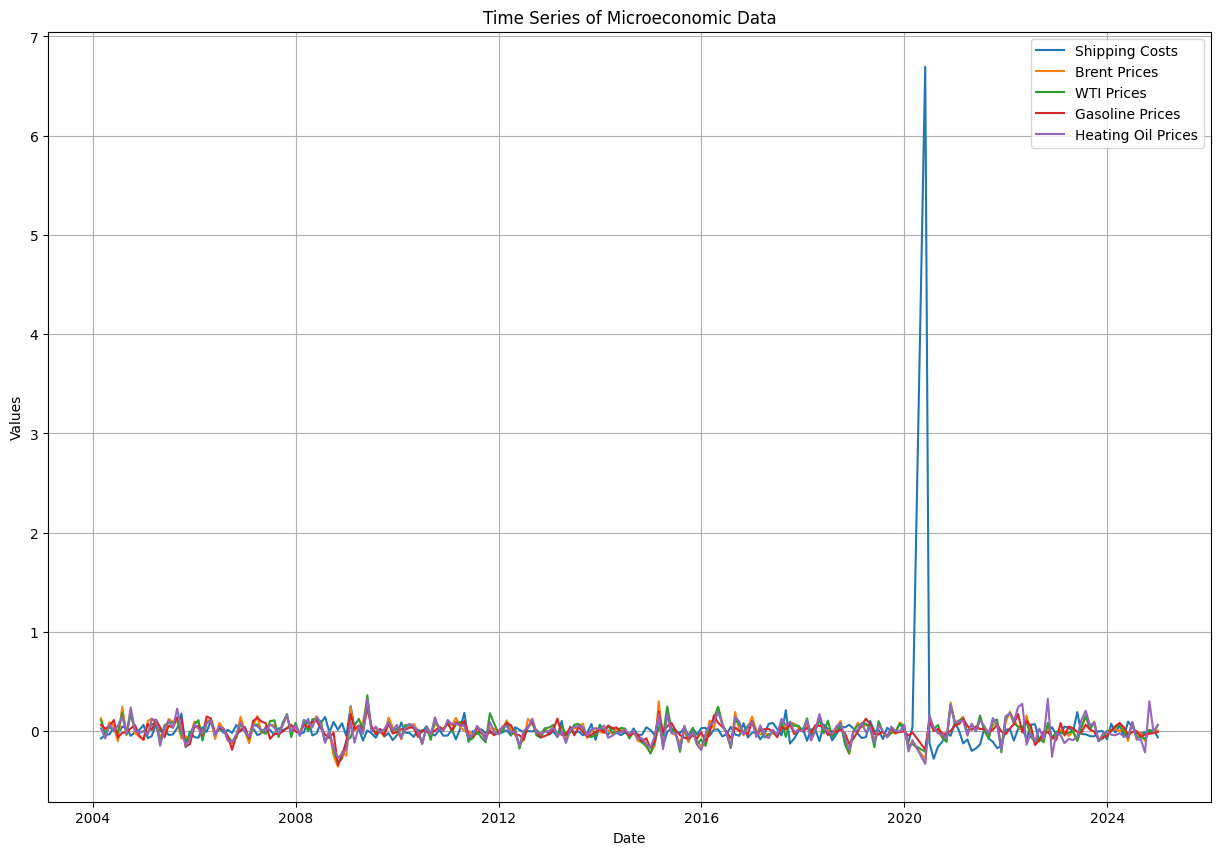

In [71]:
plt.figure(figsize=(15, 10))
for column in Micro_returns.columns:
    plt.plot(Micro_returns.index, Micro_returns[column], label=column)

plt.title("Time Series of Microeconomic Data")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

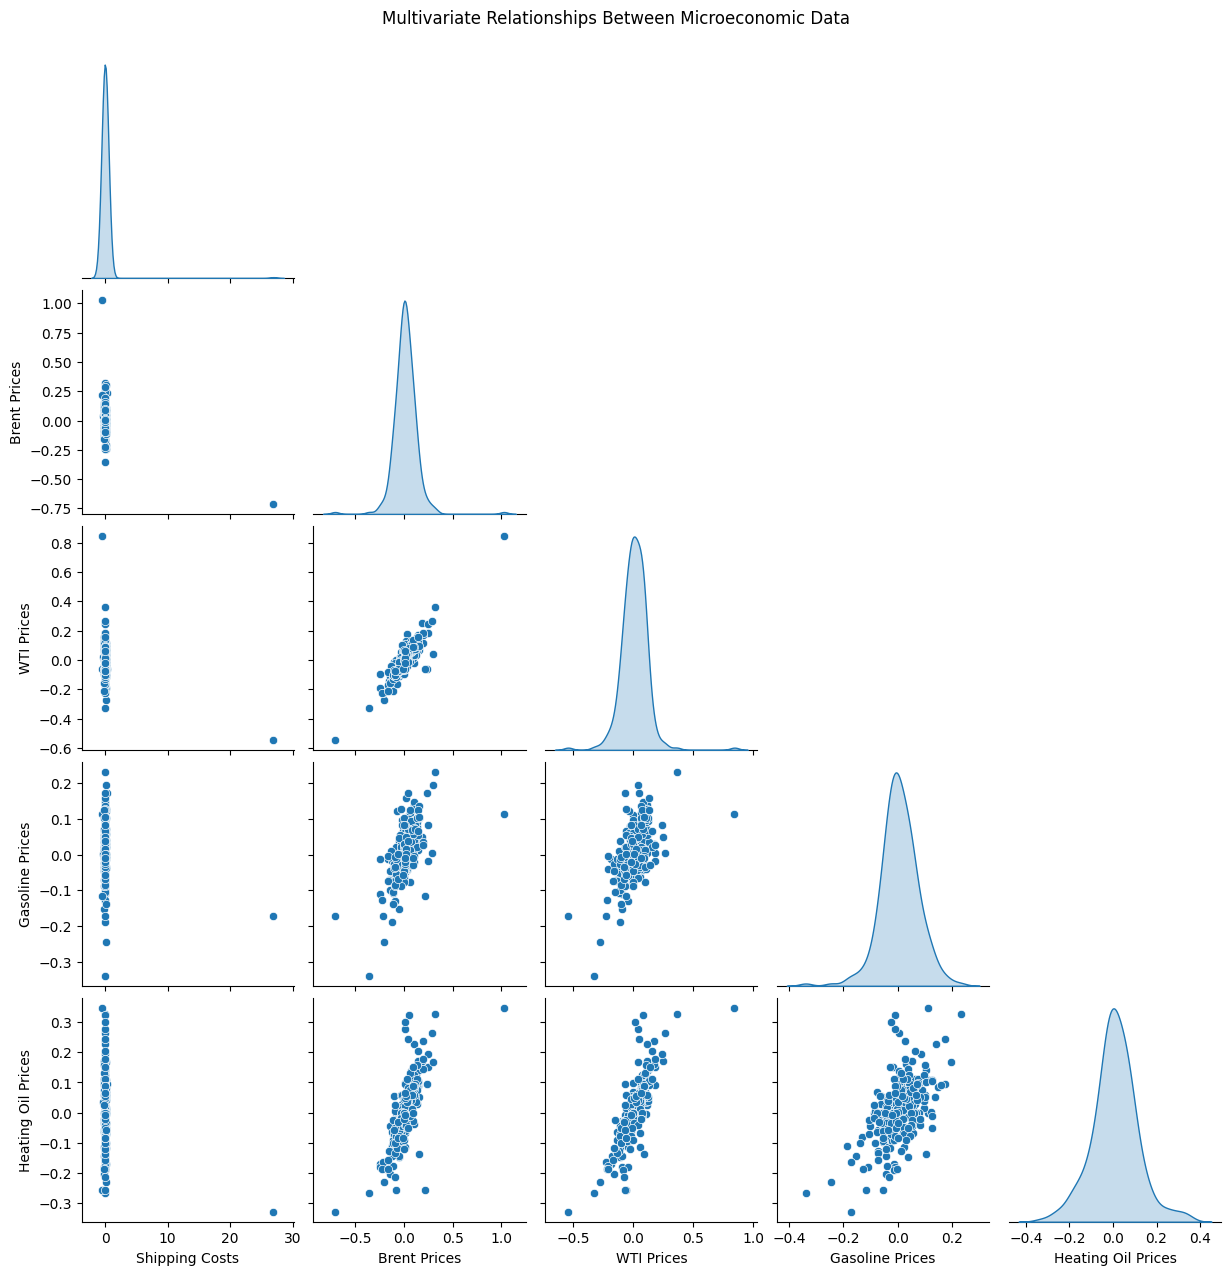

In [97]:
sns.pairplot(Micro_returns, diag_kind="kde", corner=True)
plt.suptitle("Multivariate Relationships Between Microeconomic Data", y=1.02)
plt.show()


## **Student C creates “multivariate” plots (distributional and/or time series)**

In [99]:
FinSec_returns = final_fin.dropna().pct_change().dropna()
FinSec_returns.head()

Ticker,CVX,OIH,XLE,XOM,^GSPC
Date,,,,,
2004-02-01,0.023162,0.074335,0.052538,0.033832,0.012209
2004-03-01,0.001915,-0.034224,-0.010455,-0.007630,-0.016359
2004-04-01,0.042378,-0.009736,0.021363,0.023083,-0.016791
2004-05-01,-0.012022,-0.047417,-0.003016,0.016451,0.012083
2004-06-01,0.049304,0.091864,0.058151,0.033457,0.017989


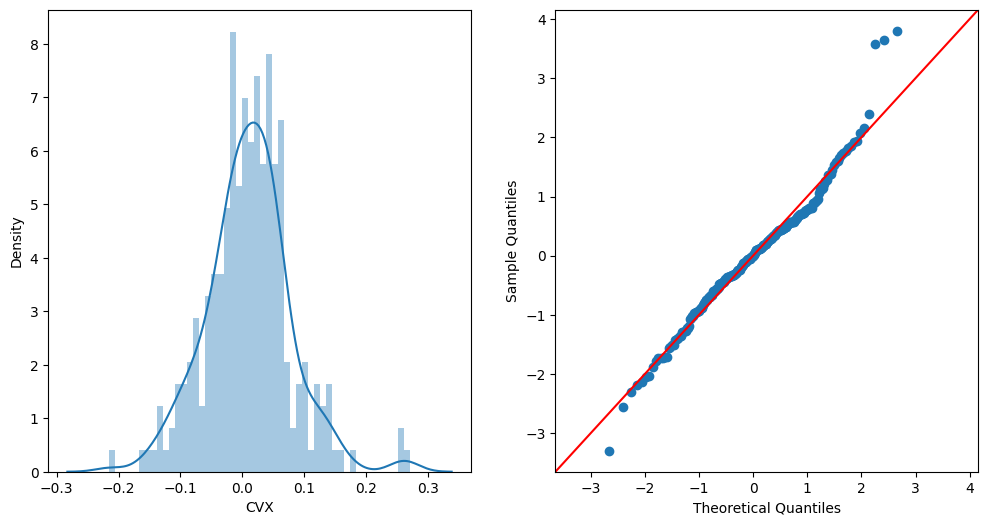

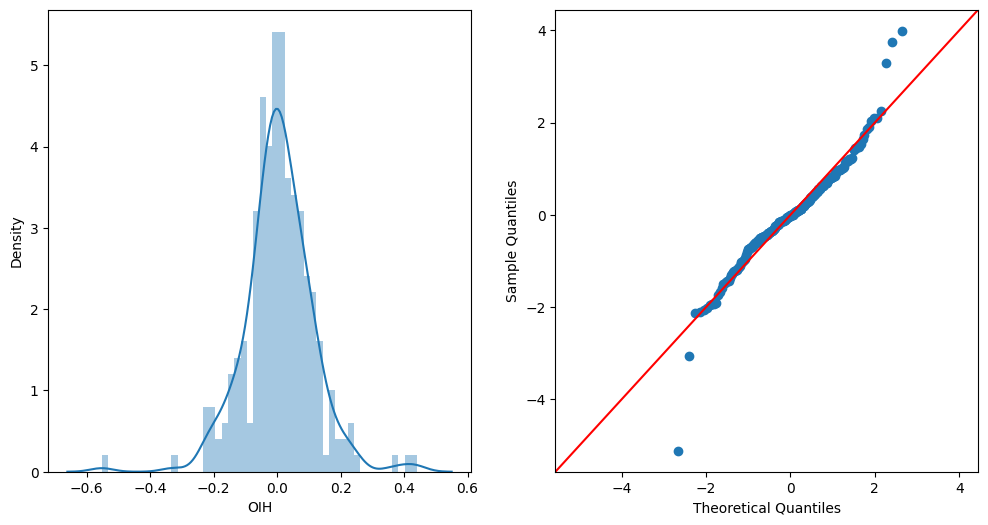

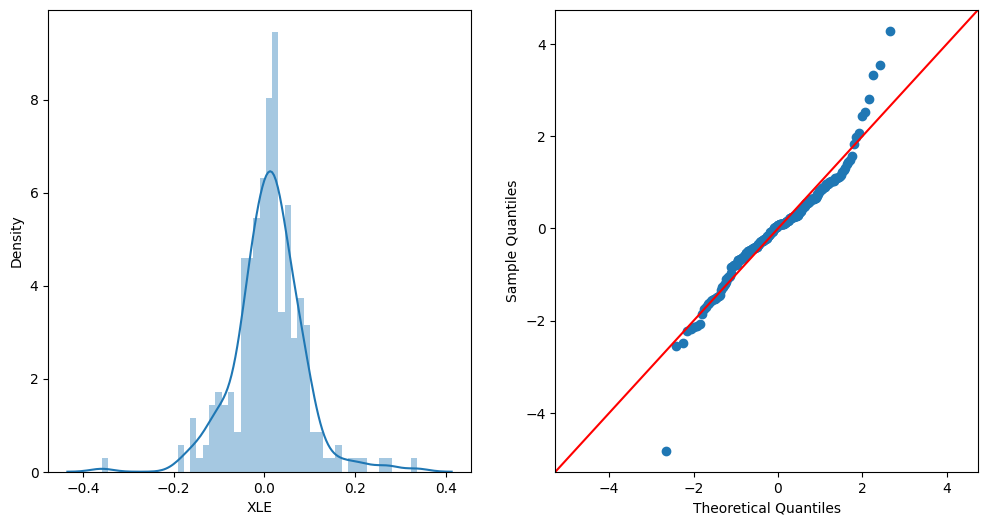

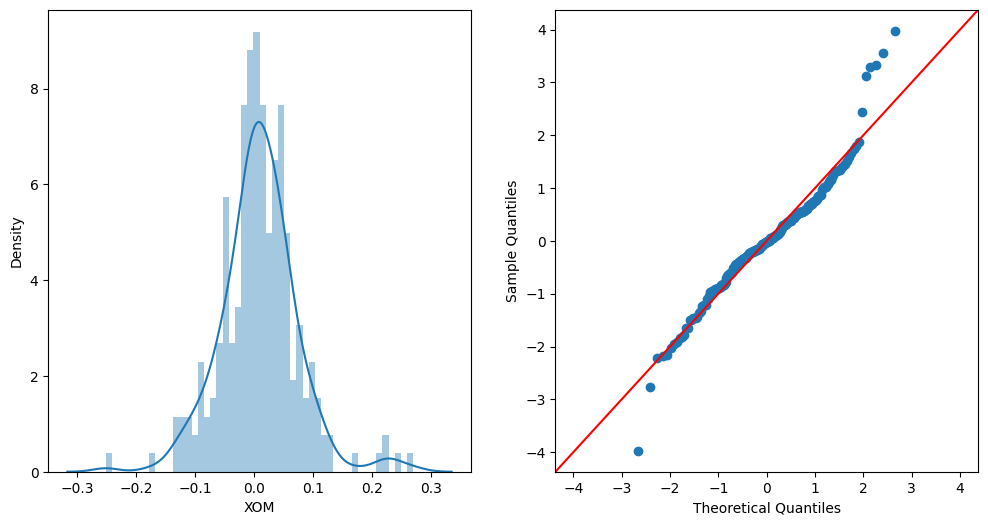

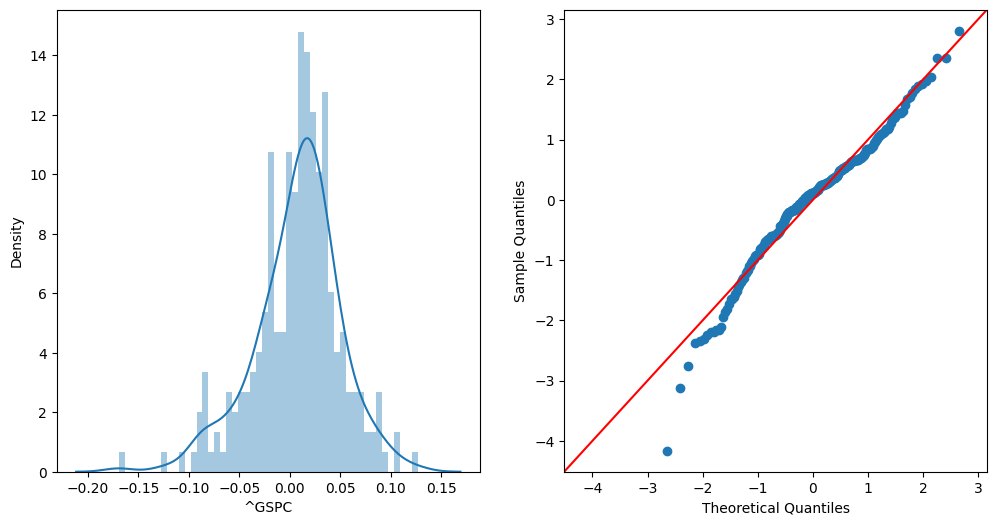

In [102]:
for i in FinSec_returns:
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    sns.distplot(a=FinSec_returns[i], ax=ax[0], bins=50)
    sm.qqplot(FinSec_returns[i], fit=True, line="45", ax=ax[1])
    fig.show()

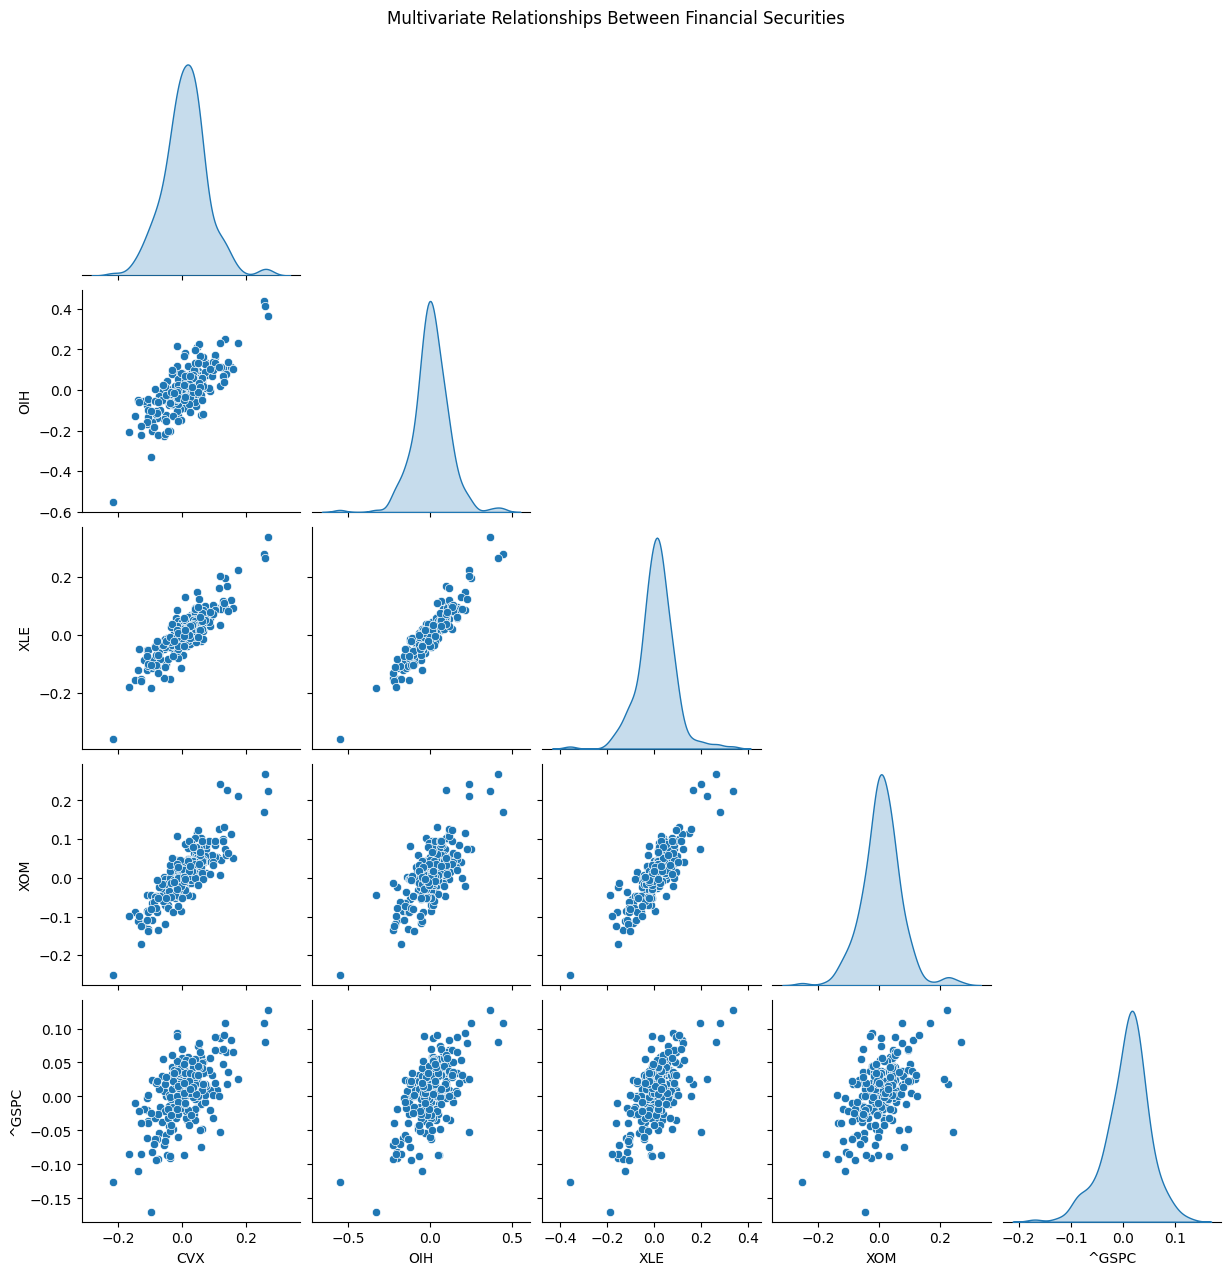

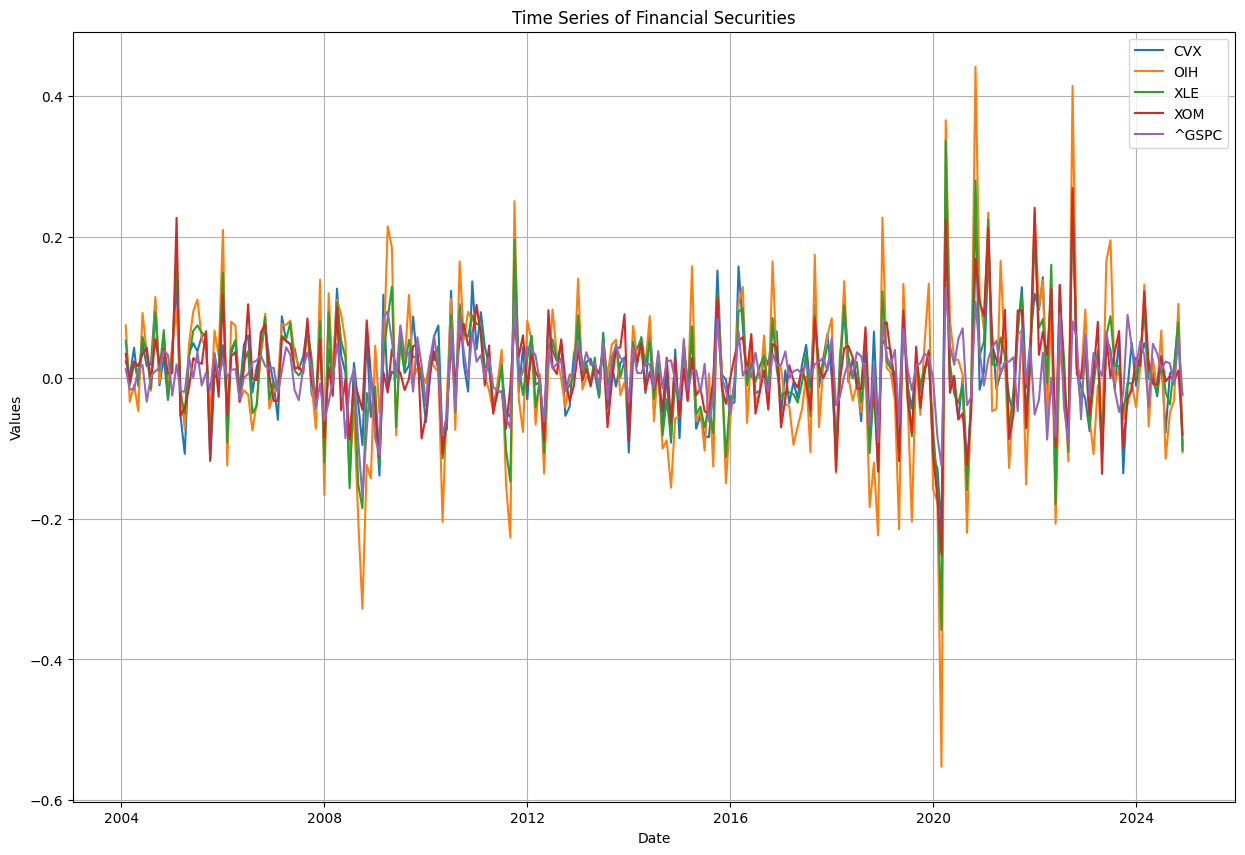

In [73]:
sns.pairplot(FinSec_returns, diag_kind="kde", corner=True)
plt.suptitle("Multivariate Relationships Between Financial Securities", y=1.02)
plt.show()

# Time series plot for financial securities
plt.figure(figsize=(15, 10))
for column in FinSec_returns.columns:
    plt.plot(FinSec_returns.index, FinSec_returns[column], label=column)

plt.title("Time Series of Financial Securities")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

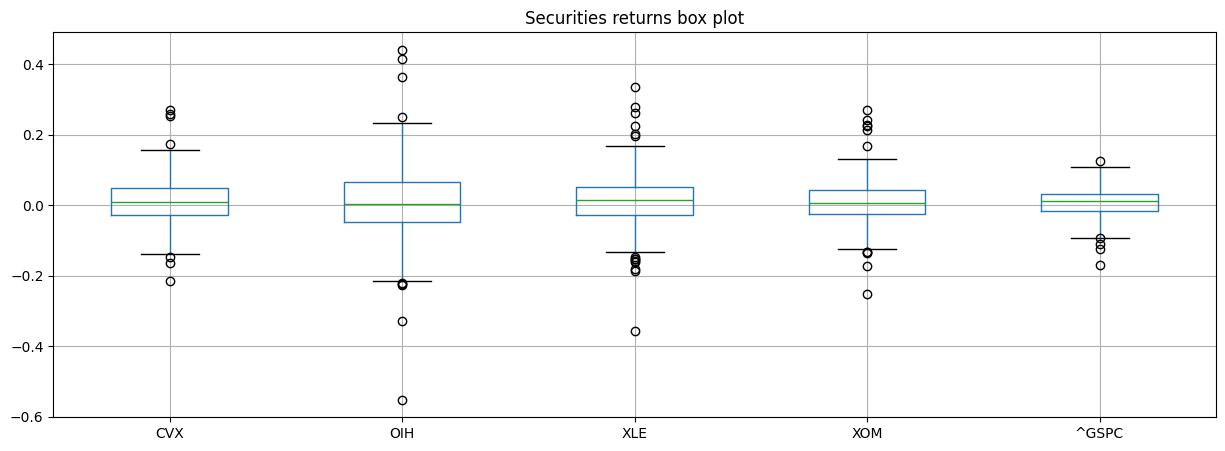

In [74]:
FinSec_returns.boxplot(figsize=(15,5))
plt.title("Securities returns box plot")
plt.show()

# **Step 8**

a. What makes oil prices look different from other asset prices?
  
  * Clustering volatility, Spike and Seasonality investigation

**Seasonality**

  The year is commonly divided into four seasons: spring, summer, fall (or autumn) and winter. Each season lasts about three months.

In [75]:
def seasonality(resampling_freq: str, data, type: str):
  df = data.dropna()
  decomp_result = seasonal_decompose(df.resample(resampling_freq).mean(), model=type)
  decomp_result.plot()
  plt.show()


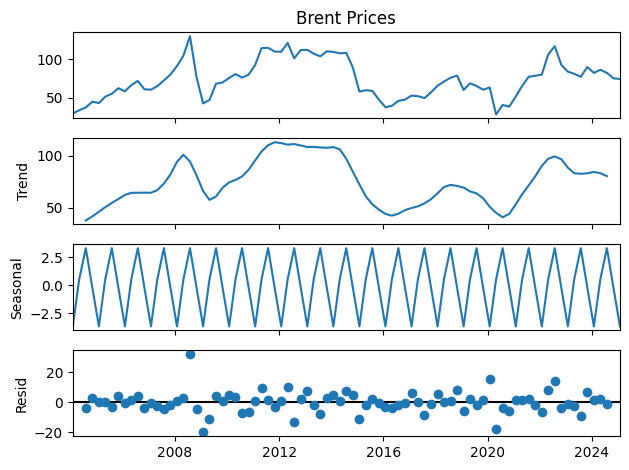

In [76]:
seasonality('3M', micro_df['Brent Prices'], 'additive')

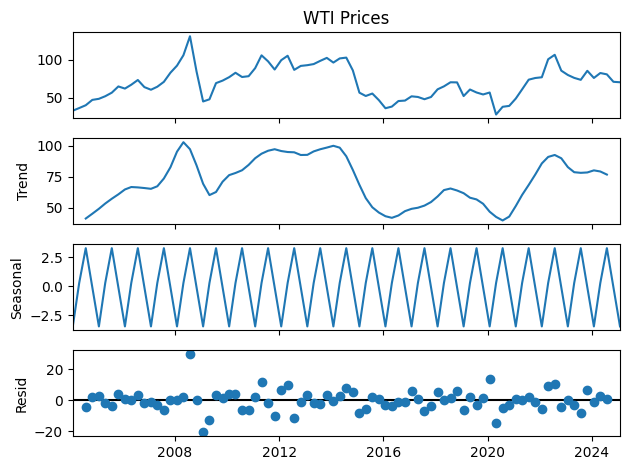

In [77]:
seasonality('3M', micro_df['WTI Prices'], 'additive')

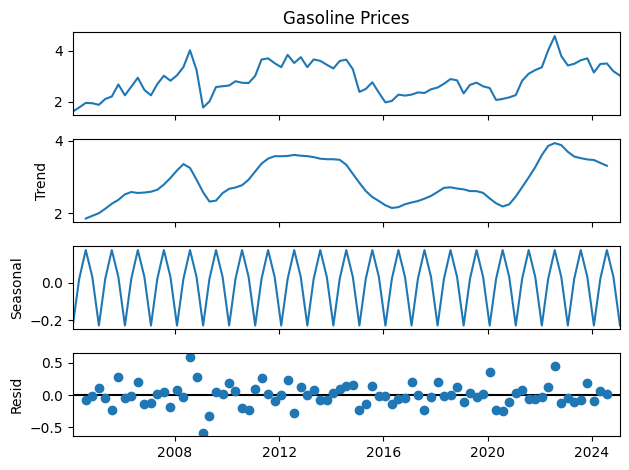

In [78]:
seasonality('3M', micro_df['Gasoline Prices'], 'additive')

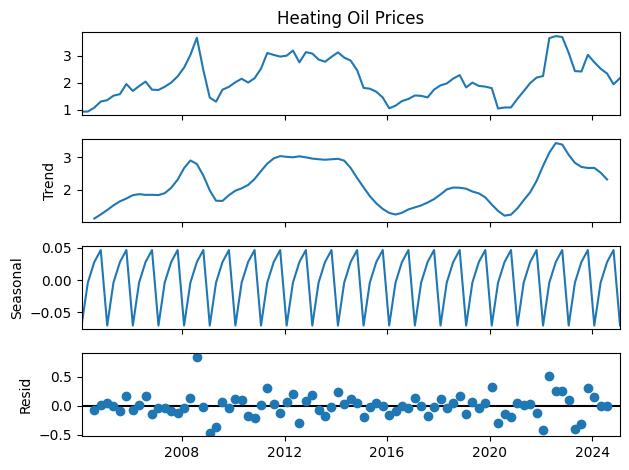

In [79]:
seasonality('3M', micro_df['Heating Oil Prices'], 'additive')

In [80]:
def monthly_variation(df, column_name):
  df = df.dropna()
  month_dic = {
      1: 'Jan',
      2: 'Feb',
      3: 'Mar',
      4: 'Apr',
      5: 'May',
      6: 'Jun',
      7: 'Jul',
      8: 'Aug',
      9: 'Sep',
      10: 'Oct',
      11: 'Nov',
      12: 'Dec'}

  months = [month_dic[i] for i in df.index.month]
  df = df.assign(Month = months)
  sns.boxplot(x='Month', y=column_name, data=df, order=month_dic.values())

  plt.ylabel("Prices")
  plt.title(f"{column_name} distribution per month");

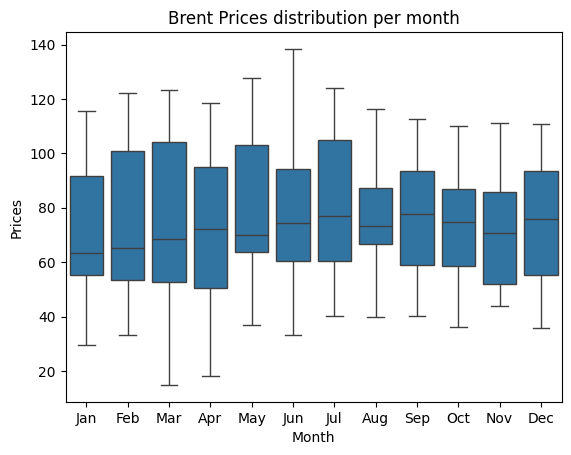

In [81]:
monthly_variation(micro_df, "Brent Prices")

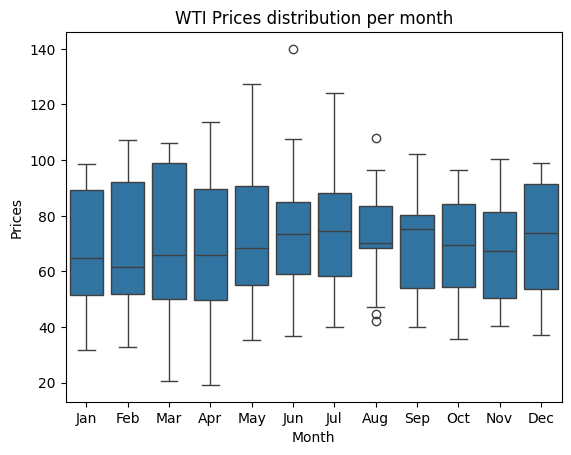

In [82]:
monthly_variation(micro_df, "WTI Prices")

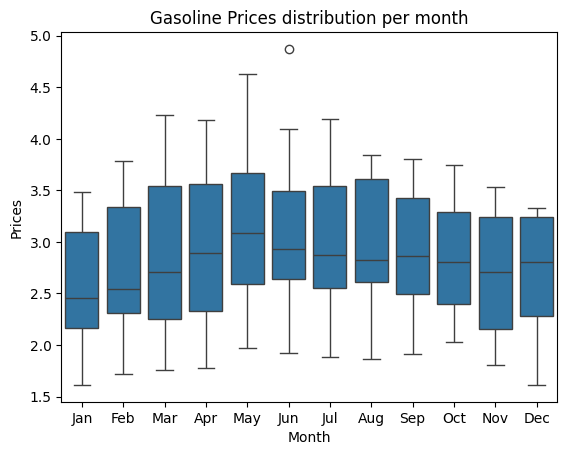

In [83]:
monthly_variation(micro_df, "Gasoline Prices")

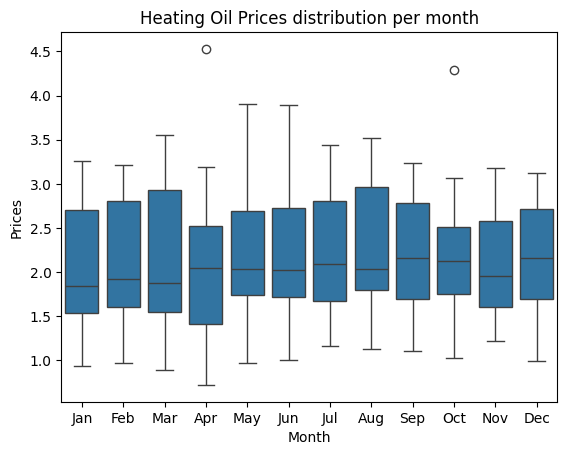

In [84]:
monthly_variation(micro_df, "Heating Oil Prices")

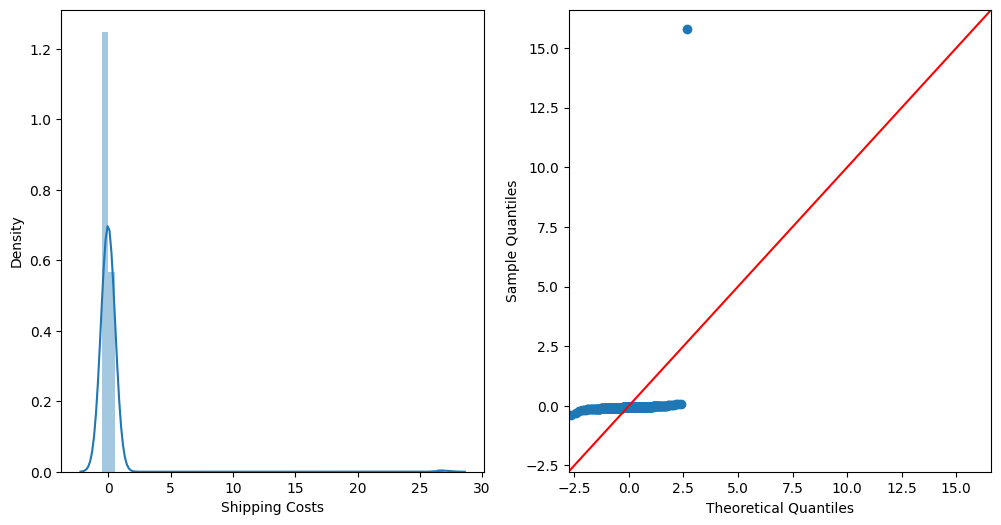

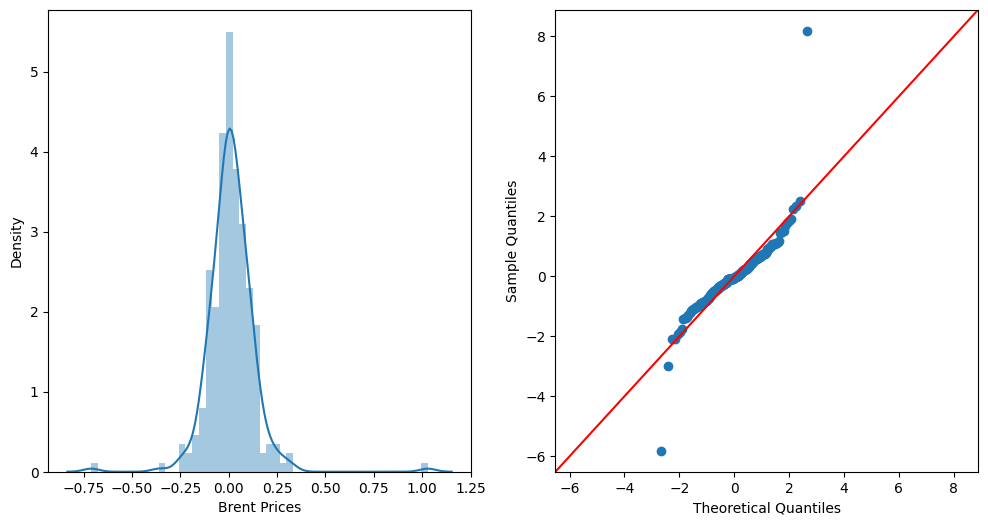

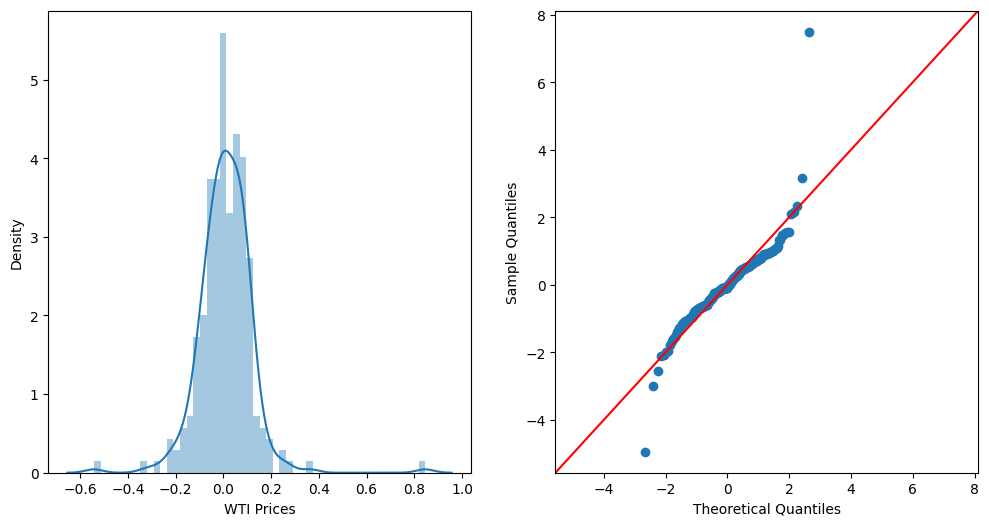

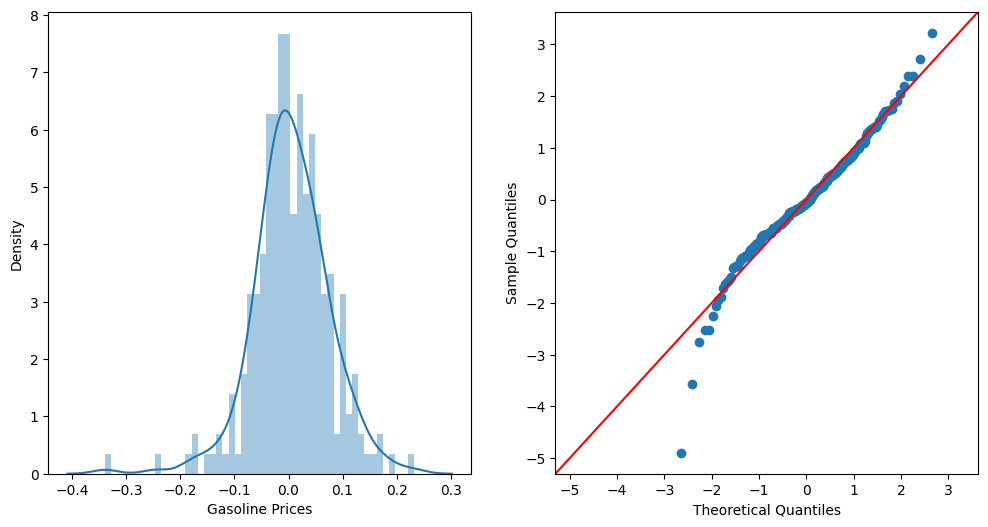

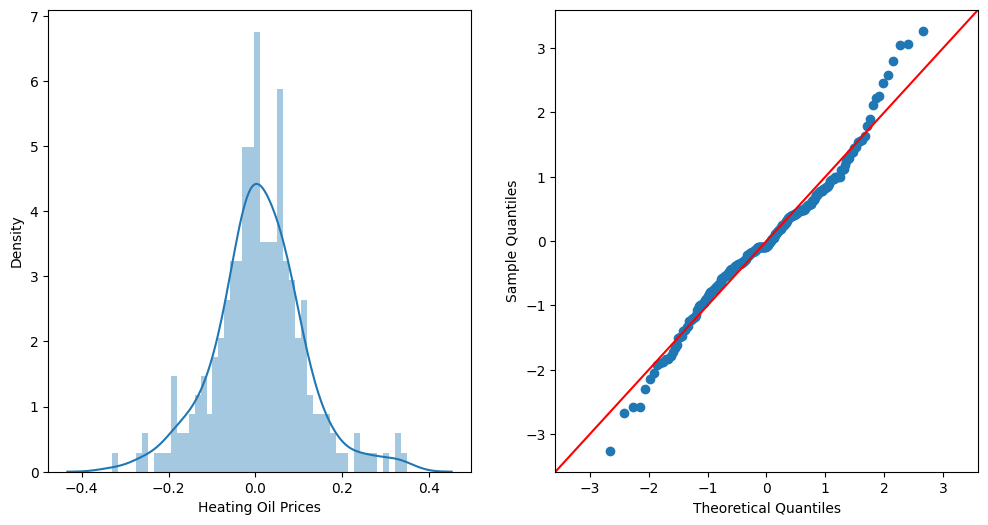

In [85]:
Micro_returns = micro_df.pct_change().dropna()
for i in Micro_returns:
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    sns.distplot(a=Micro_returns[i], ax=ax[0], bins=50)
    sm.qqplot(Micro_returns[i], fit=True, line="45", ax=ax[1])

In [86]:
print(skew(Micro_returns['Brent Prices']))
print(skew(Micro_returns['WTI Prices']))
print(skew(Micro_returns['Gasoline Prices']))
print(skew(Micro_returns['Heating Oil Prices']))

1.393177469964001
1.1077378043631787
-0.4416079595768563
0.1190519778006342


In [87]:
print(kurtosis(Micro_returns['Brent Prices']))
print(kurtosis(Micro_returns['WTI Prices']))
print(kurtosis(Micro_returns['Gasoline Prices']))
print(kurtosis(Micro_returns['Heating Oil Prices']))

20.984610669214543
13.92800549427395
2.6918542575549953
1.2535186575986588


In [88]:
print(shapiro(Micro_returns['Brent Prices']))
print(shapiro(Micro_returns['WTI Prices']))
print(shapiro(Micro_returns['Gasoline Prices']))
print(shapiro(Micro_returns['Heating Oil Prices']))

ShapiroResult(statistic=0.8188850909017986, pvalue=2.0766925868585515e-16)
ShapiroResult(statistic=0.8709928390065407, pvalue=1.0325345478084119e-13)
ShapiroResult(statistic=0.96851147274765, pvalue=2.4245679322281454e-05)
ShapiroResult(statistic=0.9784269598079568, pvalue=0.0007294568131011131)


In [89]:
print(ttest_1samp(Micro_returns['Brent Prices'], popmean= 0))
print(ttest_1samp(Micro_returns['WTI Prices'], popmean= 0))
print(ttest_1samp(Micro_returns['Gasoline Prices'], popmean= 0))
print(ttest_1samp(Micro_returns['Heating Oil Prices'], popmean= 0))

TtestResult(statistic=1.4946515423536235, pvalue=0.136266545260235, df=250)
TtestResult(statistic=1.3167996083487683, pvalue=0.18911160210879993, df=250)
TtestResult(statistic=1.1295787082279798, pvalue=0.2597364350332185, df=250)
TtestResult(statistic=1.3529994769506053, pvalue=0.17727806224279205, df=250)


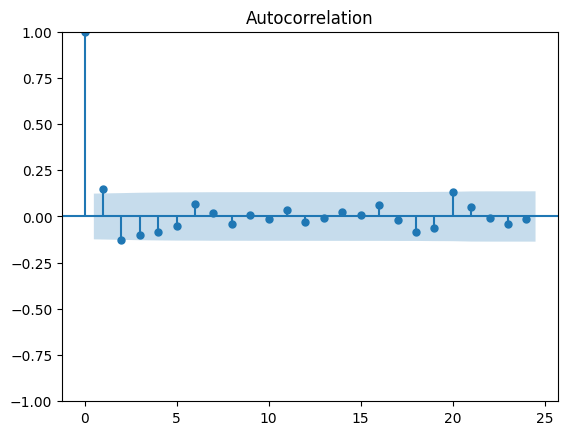

In [90]:
plot_acf(Micro_returns['Brent Prices']);

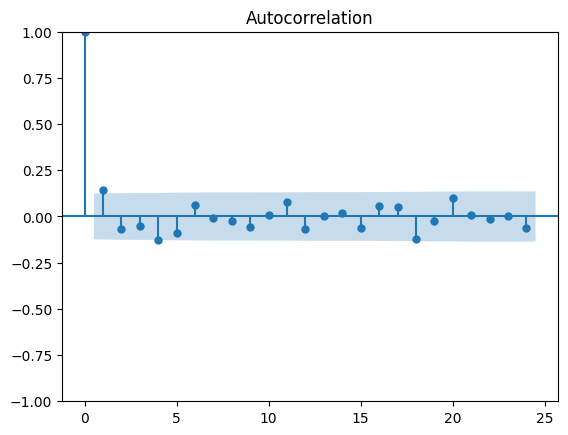

In [91]:
plot_acf(Micro_returns['WTI Prices']);

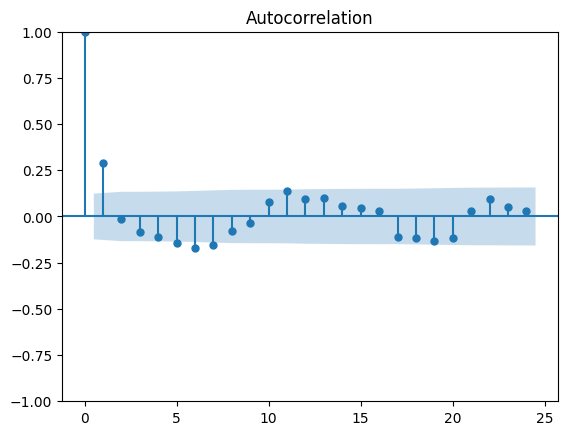

In [92]:
plot_acf(Micro_returns['Gasoline Prices']);

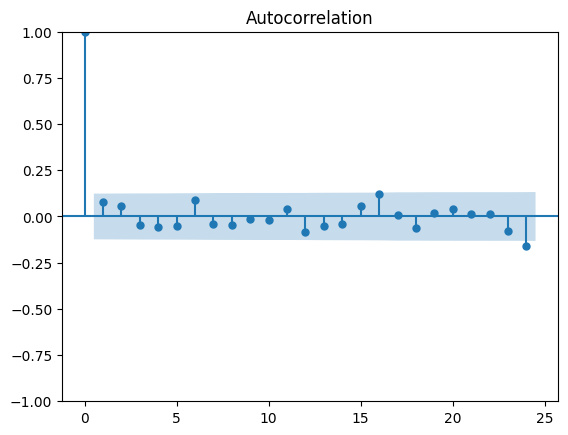

In [93]:
plot_acf(Micro_returns['Heating Oil Prices']);